In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For statistical analysis and modeling (if needed)
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('Coffee Sales.csv')

In [4]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2341 non-null   object 
 1   datetime     2341 non-null   object 
 2   cash_type    2341 non-null   object 
 3   card         2252 non-null   object 
 4   money        2341 non-null   float64
 5   coffee_name  2341 non-null   object 
dtypes: float64(1), object(5)
memory usage: 109.9+ KB


In [6]:
# Convert 'date' and 'datetime' columns to datetime format
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2341 non-null   datetime64[ns]
 1   datetime     2341 non-null   datetime64[ns]
 2   cash_type    2341 non-null   object        
 3   card         2252 non-null   object        
 4   money        2341 non-null   float64       
 5   coffee_name  2341 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 109.9+ KB


In [8]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [9]:
df.sort_values('card')

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
454,2024-05-12,2024-05-12 10:20:42.512,card,ANON-0000-0000-0001,37.72,Latte
530,2024-05-20,2024-05-20 10:58:48.379,card,ANON-0000-0000-0001,37.72,Latte
381,2024-04-28,2024-04-28 10:32:52.479,card,ANON-0000-0000-0001,37.72,Latte
371,2024-04-26,2024-04-26 10:12:50.618,card,ANON-0000-0000-0001,37.72,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,NaN,39.00,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,NaN,39.00,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,NaN,34.00,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,NaN,34.00,Americano with Milk


In [10]:
# Filter for rows where card is null
null_card_df = df[df['card'].isnull()]

# Display relevant columns: cash_type and money
print(null_card_df[['cash_type', 'money']])

    cash_type  money
12       cash   40.0
18       cash   40.0
41       cash   35.0
46       cash   40.0
49       cash   40.0
..        ...    ...
657      cash   39.0
677      cash   39.0
685      cash   34.0
691      cash   34.0
692      cash   34.0

[89 rows x 2 columns]


In [11]:
df[df['cash_type']=='cash']['cash_type'].count()

89

# Yup, the number of cash payer matches the number of null values we have. We can further verify it below

In [12]:
df[df['cash_type']=='cash'][['cash_type','card']].sample(89)

,cash_type,card
285,cash,NaN
409,cash,NaN
144,cash,NaN
18,cash,NaN
445,cash,NaN
...,...,...
403,cash,NaN
492,cash,NaN
353,cash,NaN
500,cash,NaN


In [25]:
# Yes. It turns out that the null values is because they are card numbers for the customer that paid without card.

# Sales Trends Over Time

In [13]:
# Daily Sales Analysis
daily_sales = df.groupby('date')['money'].sum().reset_index()

In [14]:
# Create a summary table for daily sales
daily_sales_summary = daily_sales.rename(columns={'date': 'Date', 'money': 'Total Sales ($)'})
print(daily_sales_summary)

          Date  Total Sales ($)
0   2024-03-01           396.30
1   2024-03-02           228.10
2   2024-03-03           349.10
3   2024-03-04           135.20
4   2024-03-05           338.50
..         ...              ...
253 2024-11-12           321.84
254 2024-11-13           194.96
255 2024-11-14           471.24
256 2024-11-15           359.06
257 2024-11-16           420.78

[258 rows x 2 columns]


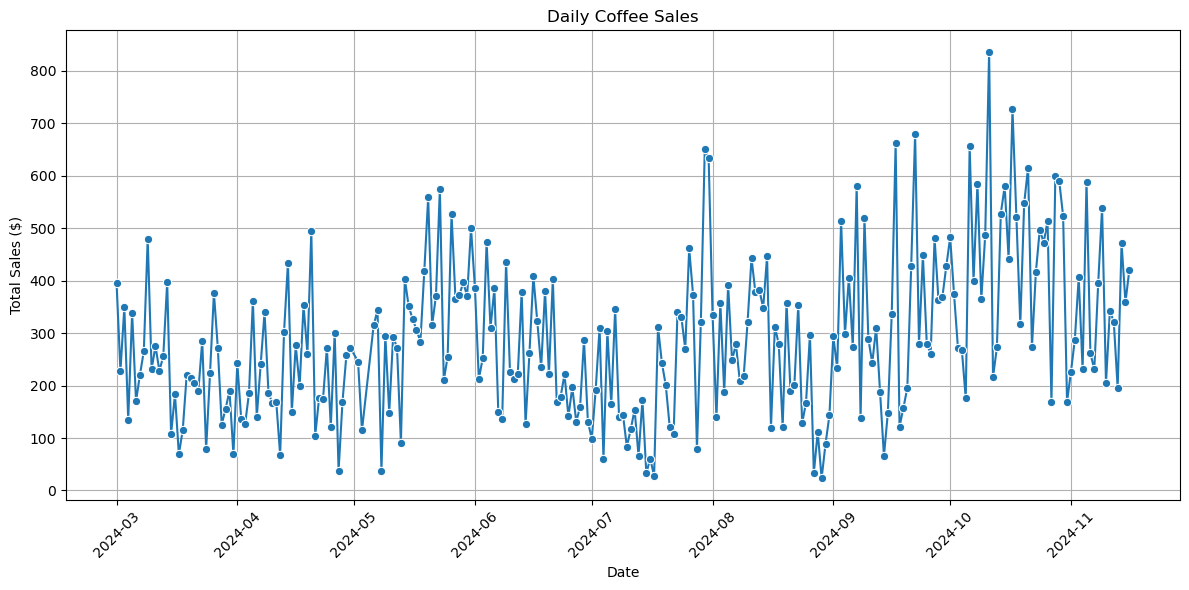

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='money', data=daily_sales, marker='o')
plt.title('Daily Coffee Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [16]:
# Weekly Sales Analysis
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day_name()

In [17]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Friday


In [18]:
Weekly_Sales = df.groupby('day')['money'].sum().reset_index()

In [41]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Weekly_Sales['day'] = pd.Categorical(Weekly_Sales['day'], categories=days_order, ordered=True)
Weekly_Sales = Weekly_Sales.sort_values('day')
Weekly_Sales.columns = ['Day', 'Total Sales ($)']
print(Weekly_Sales)

         Day  Total Sales ($)
1     Monday         10669.98
5    Tuesday         12446.72
6  Wednesday          9775.92
4   Thursday         10668.84
0     Friday         10522.78
2   Saturday         10385.98
3     Sunday         10012.76


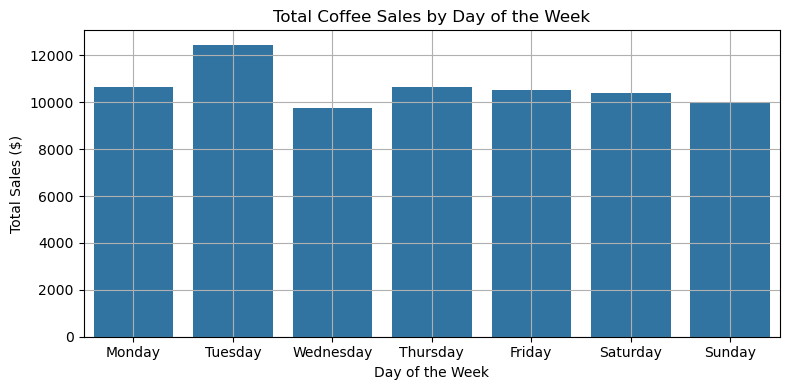

In [21]:
plt.figure(figsize=(8, 4))
sns.barplot(x='day', y='money', data=Weekly_Sales)
plt.title('Total Coffee Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()

# Revenue Analysis

In [22]:
total_revenue = df['money'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

number_of_transactions = df.shape[0]
print(f'Total Number of Transactions:{number_of_transactions}')

average_transaction_value = total_revenue/number_of_transactions
print(f'Average Transaction Value:${average_transaction_value:.2f}')

Total Revenue: $74482.98
Total Number of Transactions:2341
Average Transaction Value:$31.82


In [24]:
# This analysis will give you a clear understanding of how much, on average, each customer spends per transaction. Analyzing ATV can provide insights into consumer behavior and inform pricing strategies, marketing efforts, and inventory management.

# Most Sold Coffee Types

In [28]:
# Group data by coffee type and count the number of transactions
most_sold_coffee_types = df.groupby('coffee_name')['money'].count().reset_index()

# Rename columns for clarity
most_sold_coffee_types.columns = ['Coffee Type', 'Transaction Count']

# Sort by transaction count in descending order to identify most sold coffee types
most_sold_coffee_types = most_sold_coffee_types.sort_values(by='Transaction Count', ascending=False)

# Display the summary table
print(most_sold_coffee_types)

           Coffee Type  Transaction Count
1  Americano with Milk                559
7                Latte                555
2           Cappuccino                332
0            Americano                301
4              Cortado                222
6        Hot Chocolate                175
3                Cocoa                108
5             Espresso                 89


C:\Users\Garvit bhalse\AppData\Local\Temp\ipykernel_13344\1386435559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transaction Count', y='Coffee Type', data=most_sold_coffee_types.head(10), palette='viridis')


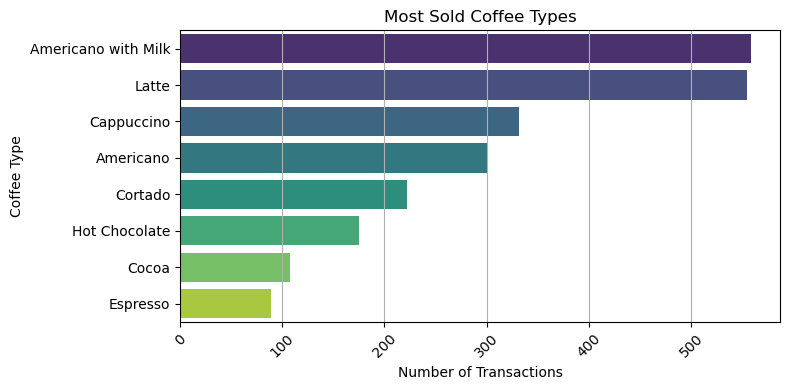

In [30]:
# Assuming 'most_sold_coffee_types' DataFrame is already created from previous code
plt.figure(figsize=(8, 4))
sns.barplot(x='Transaction Count', y='Coffee Type', data=most_sold_coffee_types.head(10), palette='viridis')
plt.title('Most Sold Coffee Types')
plt.xlabel('Number of Transactions')
plt.ylabel('Coffee Type')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Total Revenue for Each Coffee Type

In [32]:
# Group data by coffee name and calculate total revenue
sales_by_coffee_name = df.groupby('coffee_name')['money'].sum().reset_index()

# Rename columns for clarity
sales_by_coffee_name.columns = ['Coffee Type', 'Total Revenue ($)']

# Sort by total revenue in descending order to identify top-performing coffee types
sales_by_coffee_name = sales_by_coffee_name.sort_values(by='Total Revenue ($)', ascending=False)

# Display the summary table
print(sales_by_coffee_name)

           Coffee Type  Total Revenue ($)
7                Latte           19748.78
1  Americano with Milk           17091.22
2           Cappuccino           11990.70
0            Americano            7871.34
6        Hot Chocolate            6346.14
4              Cortado            5717.66
3                Cocoa            3850.56
5             Espresso            1866.58


C:\Users\Garvit bhalse\AppData\Local\Temp\ipykernel_13344\2499047691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue ($)', y='Coffee Type', data=sales_by_coffee_name.head(10), palette='coolwarm')


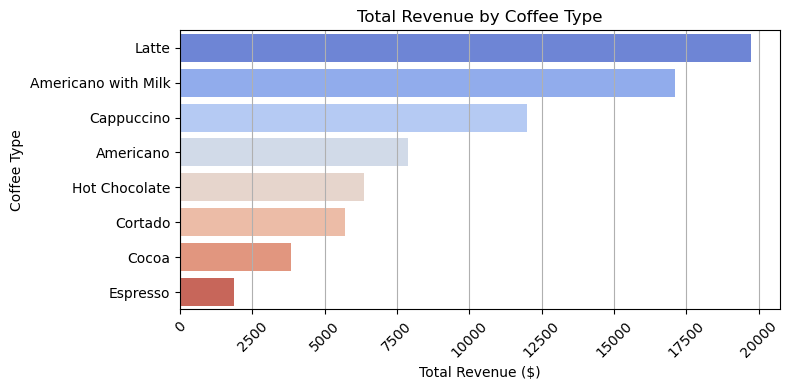

In [33]:
# Assuming 'sales_by_coffee_name' DataFrame is already created from previous code
plt.figure(figsize=(8, 4))
sns.barplot(x='Total Revenue ($)', y='Coffee Type', data=sales_by_coffee_name.head(10), palette='coolwarm')
plt.title('Total Revenue by Coffee Type')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Coffee Type')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Average Spending Per Coffee Type (Most Expensive)

In [34]:
#Group data by coffee type and calculate total spending
coffee_spending = df.groupby('coffee_name')['money'].sum().reset_index()

# count the number of transactions for each coffee type
coffee_spending['transaction_count'] = df.groupby('coffee_name')['money'].count().values

# calculate the average spending per coffee type
coffee_spending['average_spending'] = coffee_spending['money']/coffee_spending['transaction_count']

# sort by average spending for better visualisation
coffee_spending = coffee_spending.sort_values(by='average_spending', ascending=False)

print(coffee_spending.to_string(index=False))

        coffee_name    money  transaction_count  average_spending
      Hot Chocolate  6346.14                175         36.263657
         Cappuccino 11990.70                332         36.116566
              Cocoa  3850.56                108         35.653333
              Latte 19748.78                555         35.583387
Americano with Milk 17091.22                559         30.574633
          Americano  7871.34                301         26.150631
            Cortado  5717.66                222         25.755225
           Espresso  1866.58                 89         20.972809


In [35]:
# The average spending says how much customers are willing to spend on different types of coffee. Higher average spending indicates premium coffee.

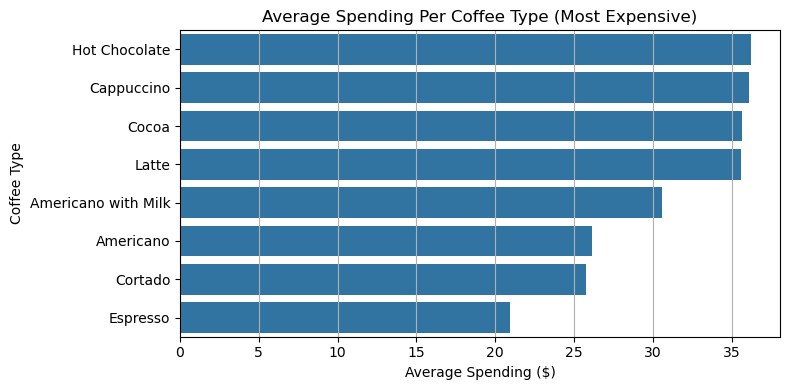

In [39]:
# visualize average spending per coffee type
plt.figure(figsize=(8, 4))
sns.barplot(x='average_spending', y='coffee_name', data=coffee_spending)
plt.title('Average Spending Per Coffee Type (Most Expensive)')
plt.xlabel('Average Spending ($)')
plt.ylabel('Coffee Type')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Payment Methods Used for Each Coffee Type

In [37]:
# Grouping data by coffee name and cash_type (payment method)
payment_methods = df.groupby(['coffee_name', 'cash_type']).size().unstack(fill_value=0)

# Display the summary table
print(payment_methods)

cash_type            card  cash
coffee_name                    
Americano             287    14
Americano with Milk   544    15
Cappuccino            317    15
Cocoa                 104     4
Cortado               217     5
Espresso               84     5
Hot Chocolate         169     6
Latte                 530    25


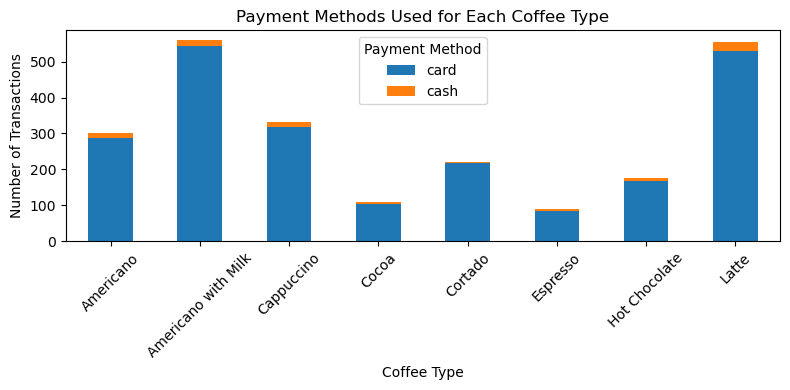

In [38]:
# visualize payment methods used for purchasing different coffee types
payment_methods.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title('Payment Methods Used for Each Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()